In [2]:
!pip install mediapipe opencv-python


[notice] A new release of pip available: 22.1.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import mediapipe as mp
import cv2
import numpy as np

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [14]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Initially set finger count to 0 for each cap
    fingerCount = 0

    if results.multi_hand_landmarks:

      for hand_landmarks in results.multi_hand_landmarks:
        # Get hand index to check label (left or right)
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label

        # Set variable to keep landmarks positions (x and y)
        handLandmarks = []

        # Fill list with x and y positions of each landmark
        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])

        # Draw hand landmarks 
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    # Display finger count
    cv2.putText(image, str(fingerCount), (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 10)

    # Display image
    cv2.imshow('MediaPipe Hands', image)
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

In [15]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


cap = cv2.VideoCapture(0)

with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
              # If loading a video, use 'break' instead of 'continue'.
            break
            
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # process image
        results = pose.process(image)

        # draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Display image
        cv2.imshow('MediaPipe Pose', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

# Video

In [2]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


videoLocation = 'D:/BOBSL/BOBSL200G/bobsl/videos/'
videoName = '6242043045785611181.mp4'
saveLocation = 'D:/Thesis'

coordinates = []

print('opening: ' + videoLocation + videoName)
vid = cv2.VideoCapture(videoLocation + videoName)

if (vid.isOpened()== False): 
  print("Error opening video stream or file")
frames = 0
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while vid.isOpened():
        success, image = vid.read()
        frames += 1
        image_height, image_width, _ = image.shape
        if not success:
            print("Ignoring empty camera frame.")
            break
            
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        if not results.pose_landmarks:
            print("no land marks this frame")
            continue
        else:
            coordinates.append(results.pose_landmarks.landmark)
        
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # process image
        results = pose.process(image)
        results

        # draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Display image
        cv2.imshow('MediaPipe Pose', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
coordinates = np.array(coordinates)
print('number of frames: ', frames)

print(coordinates.shape)
print(coordinates)
vid.release()

cv2.destroyAllWindows()

NameError: name 'mp' is not defined

# Animate the coordinates

### from https://matplotlib.org/2.1.2/gallery/animation/simple_3danim.html

In [56]:
%matplotlib notebook

In [55]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [59]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines

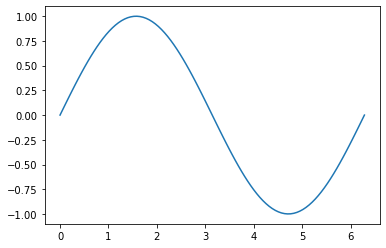

In [53]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

(41, 33)


<IPython.core.display.Javascript object>


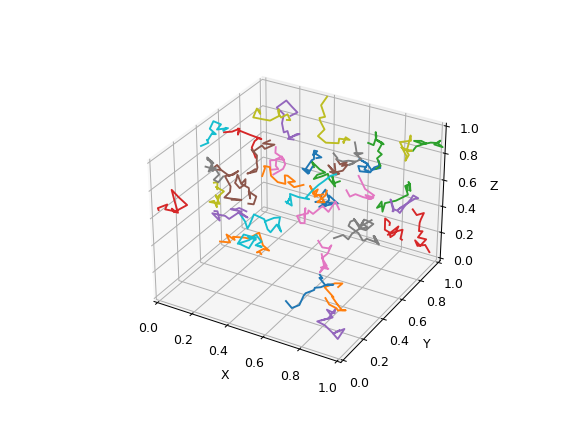

In [60]:
print(coordinates.shape)

# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, num_steps, fargs=(walks, lines), interval=100)
plt.show()

## Destroy page

In [31]:
cv2.destroyAllWindows()